# 계층적 군집의 덴드로그램

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기 + 스케일링

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/game_usage.xlsx", info=False)
df = my_standard_scaler(origin)
my_pretty_table(df.head())

+----+--------------+--------------+
|    |   time spent |   game level |
|----+--------------+--------------|
|  0 |    -0.250733 |       1.4748 |
|  1 |     0.326494 |     0.606546 |
|  2 |      -0.6115 |     0.795456 |
|  3 |     0.470801 |      1.67461 |
|  4 |     -1.40519 |     -1.55865 |
+----+--------------+--------------+


## #02. 군집 수행

### [1] scipy 패키지를 사용한 계층적 군집

#### (1) 군집 모형 구현

scipy 패키지에서는 병합군집 기능을 제공한다.

군집 결과를 2차원 배열로 리턴해 준다.

> 여기서는 하이퍼파라미터는 모두 기본값 상태로 수행함

In [3]:
lnk = linkage(df)
lnk

array([[3.60000000e+01, 8.70000000e+01, 3.76869846e-02, 2.00000000e+00],
       [5.10000000e+01, 9.80000000e+01, 3.76869846e-02, 2.00000000e+00],
       [2.50000000e+01, 4.20000000e+01, 4.63269855e-02, 2.00000000e+00],
       [8.00000000e+00, 3.70000000e+01, 5.11987456e-02, 2.00000000e+00],
       [1.20000000e+01, 1.70000000e+01, 5.38374037e-02, 2.00000000e+00],
       [5.30000000e+01, 7.20000000e+01, 5.38374037e-02, 2.00000000e+00],
       [6.50000000e+01, 9.00000000e+01, 7.25183053e-02, 2.00000000e+00],
       [1.60000000e+01, 4.10000000e+01, 7.53739693e-02, 2.00000000e+00],
       [4.70000000e+01, 6.80000000e+01, 8.24806098e-02, 2.00000000e+00],
       [1.80000000e+01, 9.70000000e+01, 9.77249893e-02, 2.00000000e+00],
       [2.00000000e+01, 8.10000000e+01, 9.98525451e-02, 2.00000000e+00],
       [7.00000000e+00, 1.00000000e+02, 1.01110153e-01, 3.00000000e+00],
       [3.20000000e+01, 5.00000000e+01, 1.05006463e-01, 2.00000000e+00],
       [1.40000000e+01, 9.40000000e+01, 1.07674807e

#### (2) 군집 결과 시각화

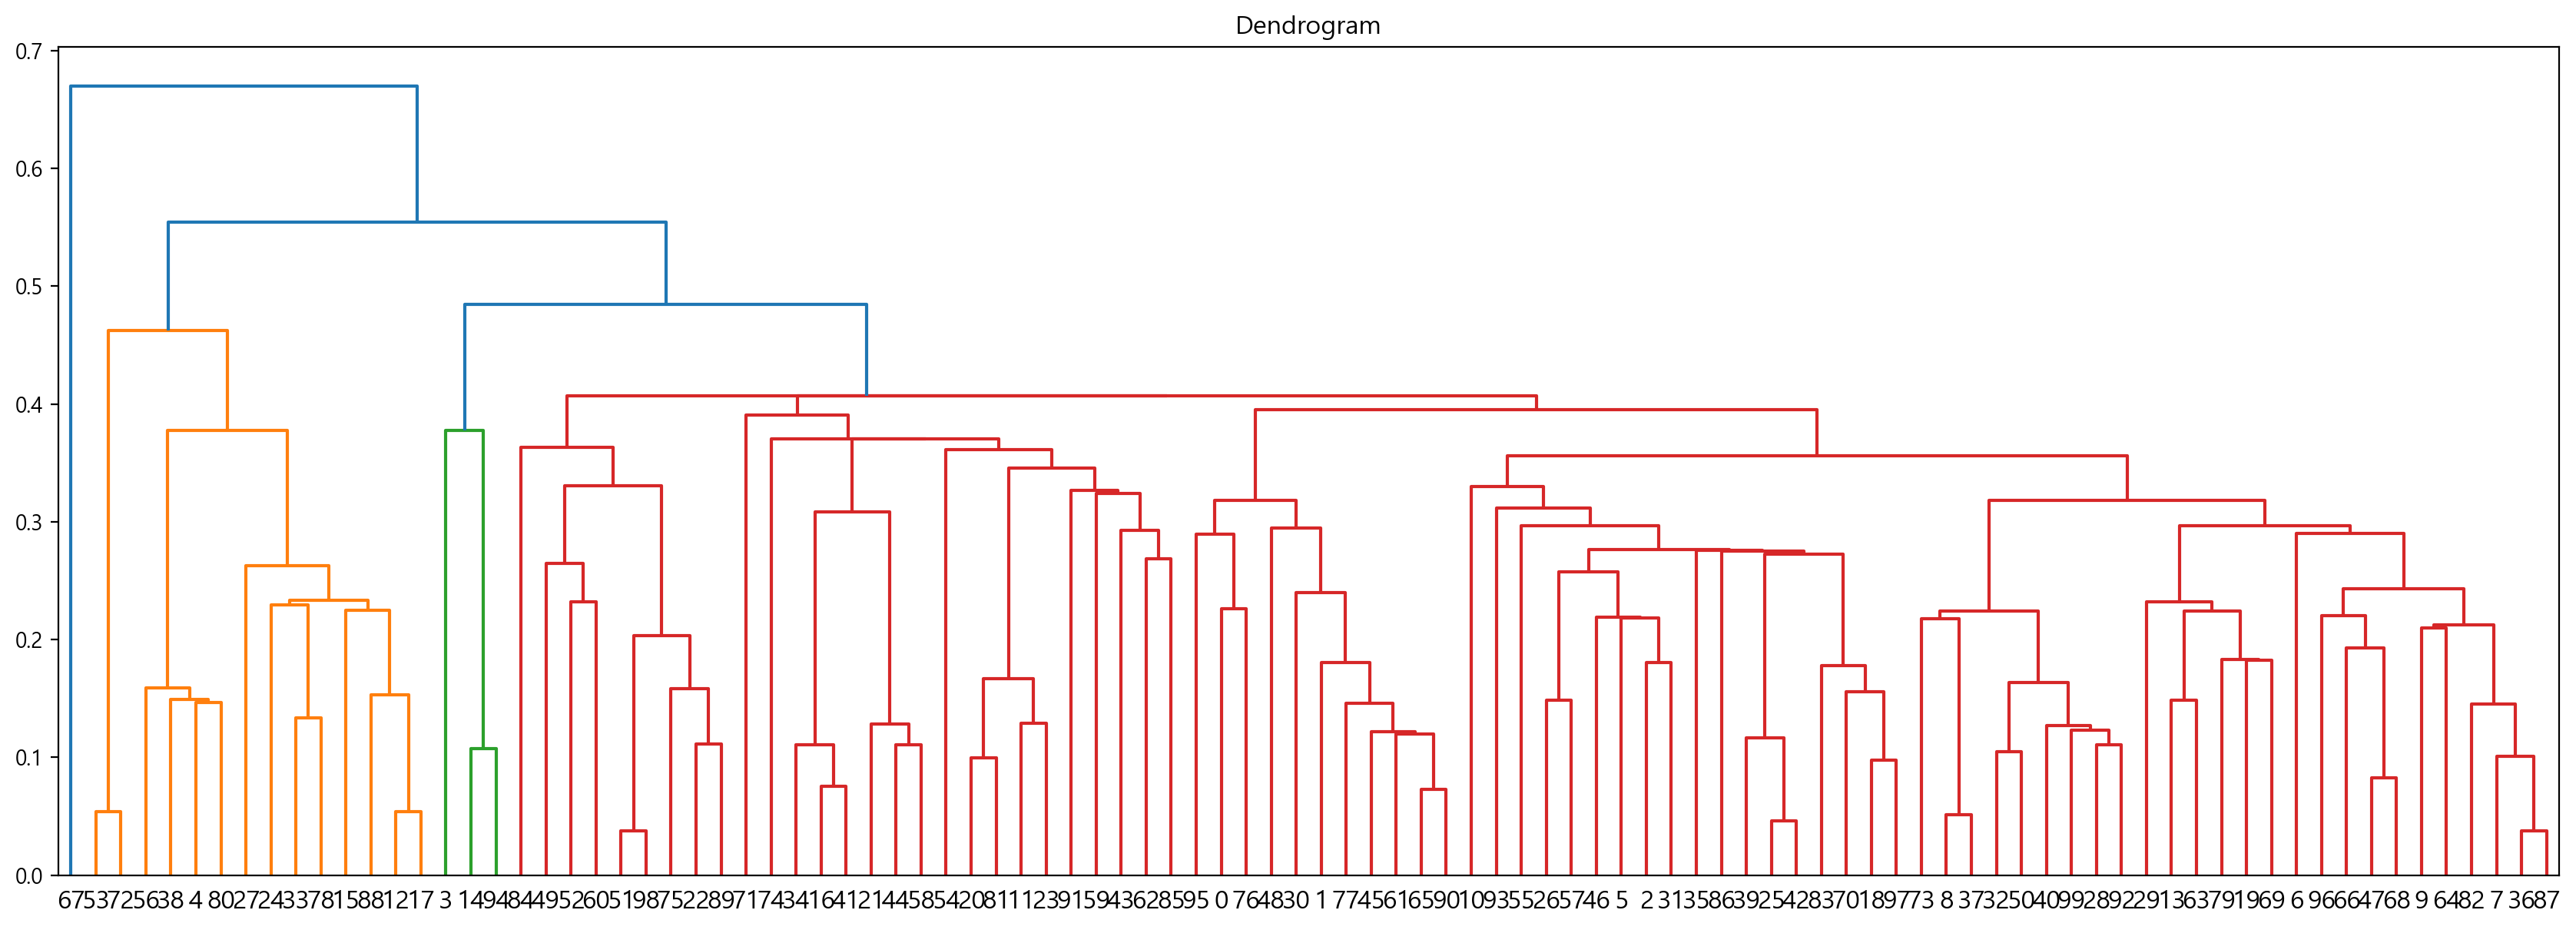

In [4]:
fig = plt.figure(figsize=(21,7), dpi=200)
ax = fig.gca()

dendrogram(lnk, ax=ax, 
           leaf_rotation=0, leaf_font_size=12,
           count_sort = 'ascending',
           distance_sort = 'ascending',
           show_leaf_counts=True)


ax.set_title('Dendrogram')
plt.show()
plt.close()

### [2] sklearn을 사용한 군집

#### (1) 군집 모델 구현

In [6]:
estimator = AgglomerativeClustering(n_clusters=4, 
                                    compute_distances = True)

estimator.fit(df)
result_df = origin.copy()
result_df['cluster'] = estimator.labels_

my_pretty_table(result_df.head(10))

+----+--------------+--------------+-----------+
|    |   time spent |   game level |   cluster |
|----+--------------+--------------+-----------|
|  0 |           39 |          944 |         1 |
|  1 |           55 |          705 |         1 |
|  2 |           29 |          757 |         2 |
|  3 |           59 |          999 |         1 |
|  4 |            7 |          109 |         0 |
|  5 |           35 |          749 |         2 |
|  6 |           11 |          520 |         0 |
|  7 |           30 |          410 |         0 |
|  8 |           50 |          225 |         0 |
|  9 |           23 |          470 |         0 |
+----+--------------+--------------+-----------+


#### (3) 군집 결과 시각화

`estimator`객체가 포함하고 있는 여러 프로퍼티들을 조합해서 scipy 패키지의 리턴값과 동일한 형태로 구성해주는 함수

> 출처: ... 기억 안남 ... ㅜㅜ

In [7]:
def my_dandrogram_source(estimator):
    counts = np.zeros(estimator.children_.shape[0])
    n_samples = len(estimator.labels_)

    for i, merge in enumerate(estimator.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [estimator.children_, estimator.distances_, counts]
    ).astype(float)
    
    # 시각화에 필요한 배열 리턴
    return linkage_matrix

#### (4) 함수를 통해 리턴받은 값을 시각화

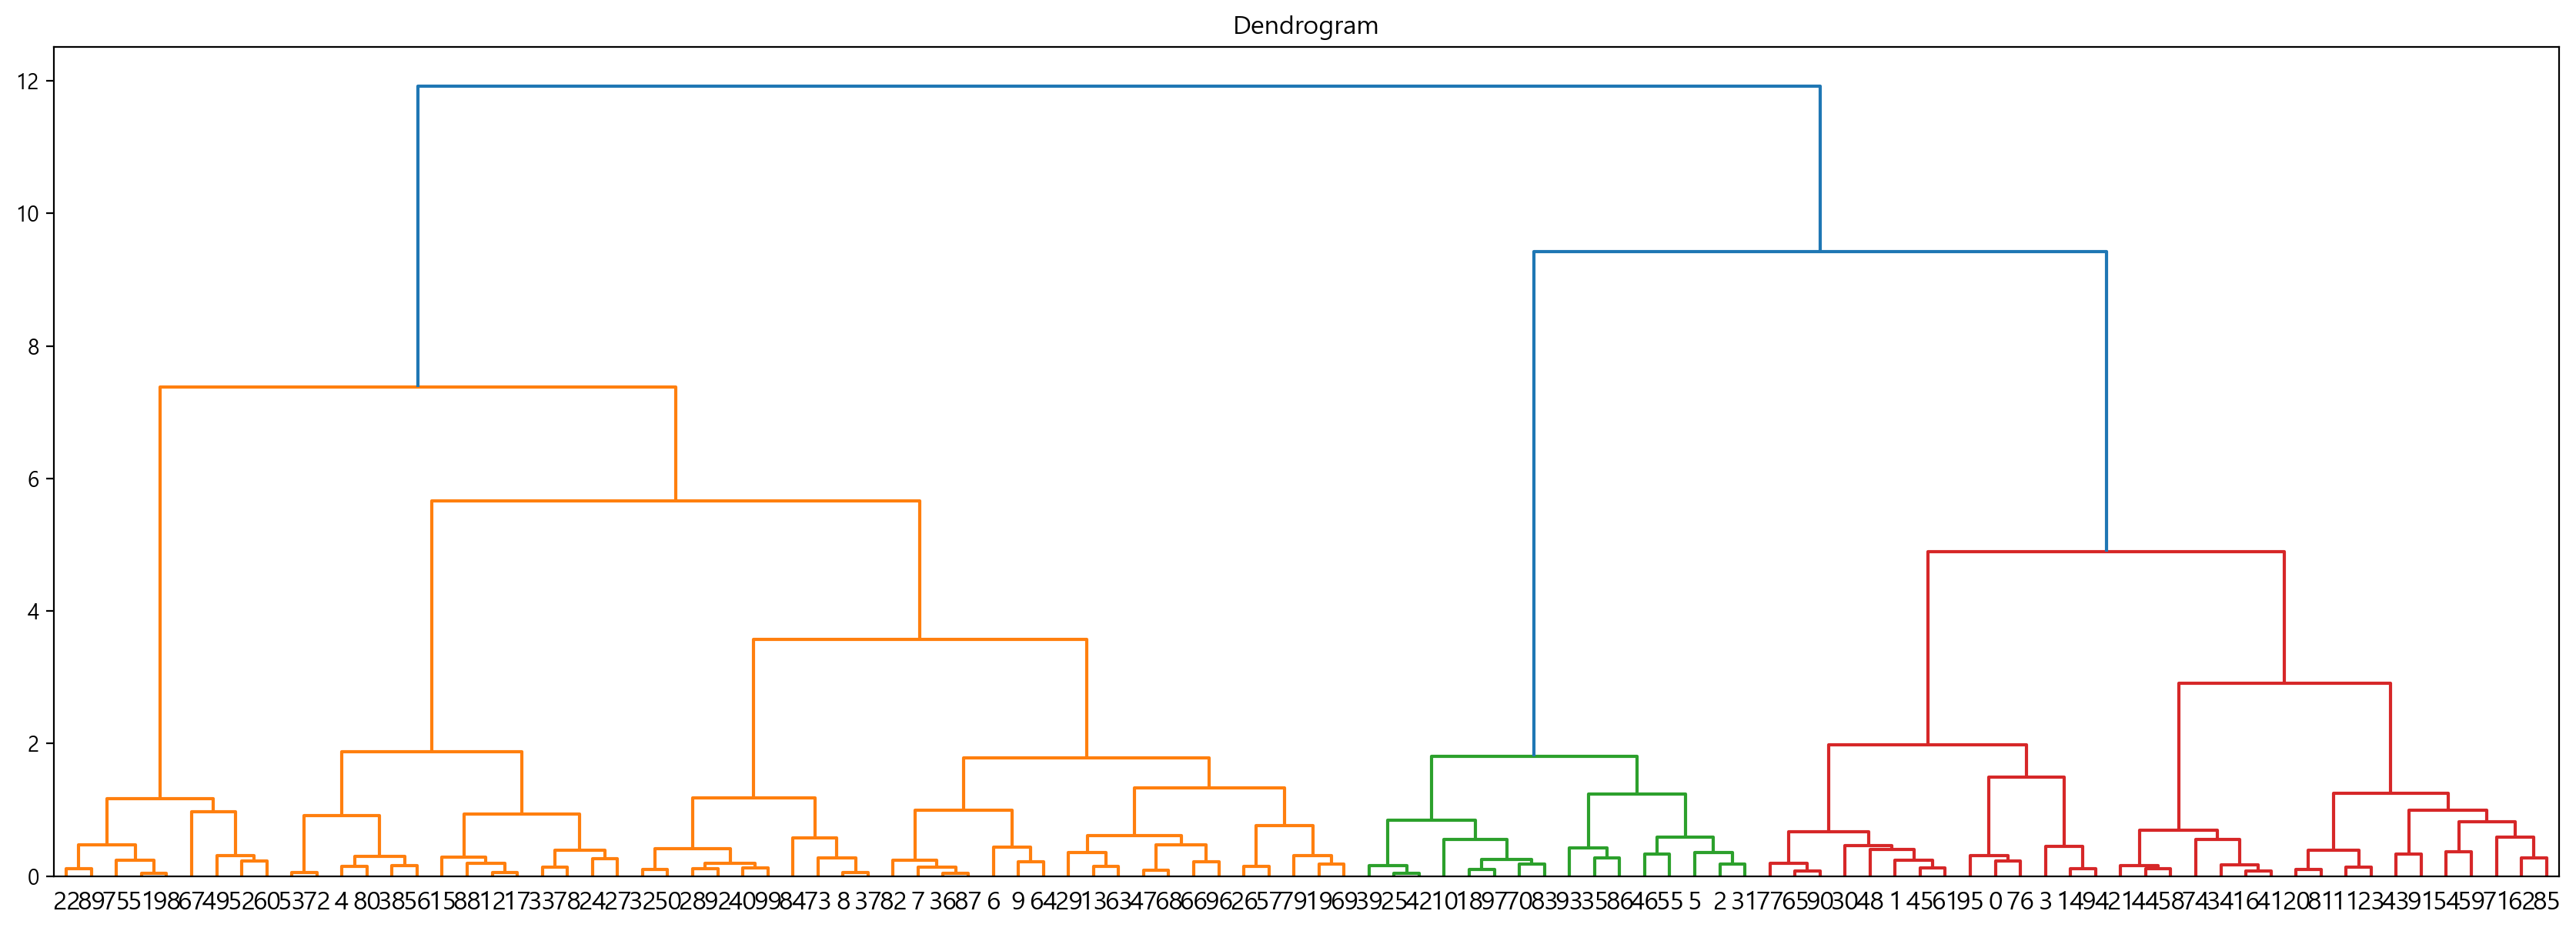

In [8]:
data = my_dandrogram_source(estimator)

fig = plt.figure(figsize=(21,7), dpi=200)
ax=fig.gca()

dendrogram(data, show_leaf_counts=True, ax=ax, leaf_rotation=0, leaf_font_size=12,
           show_contracted=True)

ax.set_title('Dendrogram')

plt.show()
plt.close()